# **군집알고리즘(3) 고객 데이터셋**
## k-means

### 1) 데이터 로드



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
file_url = 'https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer.csv'
customer = pd.read_csv(file_url)
customer.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


> cc_num : 카드번호 <br>
> category : 범주 <br>
> amt : 거래금액

In [ ]:
customer['cc_num'].nunique() #100개의 카드번호(=고객정보)

100

In [ ]:
customer['category'].nunique()

11

### 2) 전처리 : 피처 엔지니어링

범주별 금액을 계산하려면 category변수를 더미변수로 변환시켜주어야 한다.

In [ ]:
# 더미변수로 변환
customer_dummy = pd.get_dummies(customer, columns=['category'])
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


범주별로 얼마만큼의 금액을 썼는지를 계산하기 위해 더미 변수로 변환된 영역에 amt(거래금액)변수의 값을 곱하여 계산.

더미변수들은 특정범주에 해당하면 1, 해당 사항이 없으면 0이되므로 거래금액인 amt변수를 곱하면 자연스럽게 사용된 변수에 금액이 들어간다.

In [ ]:
# 더미로 변환된 변수들의 이름을 하나의 리스트로 모으기
category_list = customer_dummy.columns[2:]

In [ ]:
for i in category_list:
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']
    # 금액으로 변수 업데이트

In [ ]:
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [ ]:
customer_agg = customer_dummy.groupby('cc_num').sum() #cc_num 별 amt합계
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg),
                         columns = customer_agg.columns,
                         index = customer_agg.index)

In [ ]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


> 다른 고객들과 비슷한 수준이면, 즉 평균에 가까울 경우 0에 근접한 값을 보여주게 되고, 더 많이 사용했으면 더 큰 양수를, 더 적게 사용했으면 더 작은 음수를 갖습니다.

### 모델링 및 성능평가

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

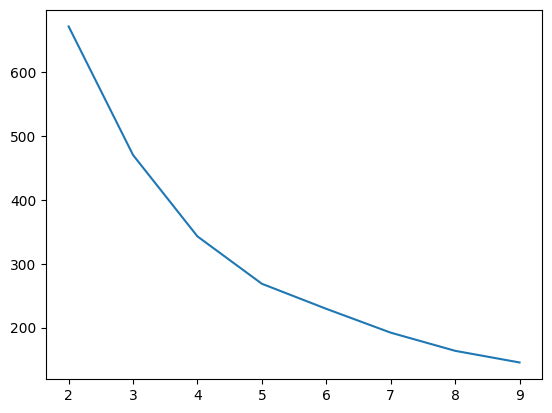

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia=[]
silhouette = []

for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    labels = km.labels_
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(scaled_df, labels))


plt.plot(range(2,10), inertia)
plt.show()


> inertia_는 클러스터 중심과 그 데이터포인트 간의 거리의 오차 합을 나타내는 것. 응집도 정도를 나타냄.
> inertia_가 작아진다는 것은 클러스터가 잘 되었다는 것. 하지만 어느 순간 미미하게 낮아지는데, 이 부분을 elbow point라고 한다.

> 해당 예시에서는 K=4가 적합

<Axes: >

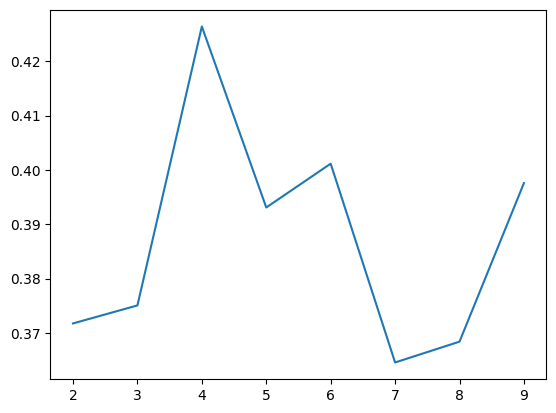

In [ ]:
sb.lineplot(x=range(2,10), y=silhouette)

> silhouette coeffient는 1에 가까울수록 좋다
> 왜냐면, 다른 클러스터간 분리 정도를 나타내는 지표이기 때문

### 최종 예측 모델 및 결과해석

In [ ]:
# optimal_k = 4
km = KMeans(n_clusters=4, random_state=42)
km.fit(scaled_df)
labels = km.labels_

scaled_df['label'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
cc_num,,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,2
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [ ]:
# label별 평균값
scaled_df_mean = scaled_df.groupby('label').mean()

# label별 등장 횟수 - category_travel에 해당하는
scaled_df_count = scaled_df.groupby('label').count()['category_travel']

# 이름변경
scaled_df_count = scaled_df_count.rename('count')

# 데이터 합치기
scaled_df_all = scaled_df_mean.join(scaled_df_count)
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.983797,-0.826826,-0.820264,-0.807530,-0.746914,-1.037601,-0.943190,-1.017107,-0.788890,-0.903252,-0.760563,-0.266604,36
1,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
3,0.181113,0.043536,0.071197,0.868891,0.032581,0.356233,0.220808,0.524956,0.235603,0.341387,-0.070841,-0.264840,46


> cluster0(=label 0) : 전체 지출액부터 각 범주의 금액까지 모두 타 클러스터에 비해 낮다. 여기에 속하는 고객 수는 36명.

> cluster1(=label 1) : entertainment, grocery, misc, personal_care, shopping에서 타 클러스터보다 높은 지출을 보인다.

> cluster2(=lable 2) : travel 에서 타 클러스터 보다 높은 지출을 보인다.

> cluster3(=label 3) : 가장 많은 고객수를 가짐.